## Addressing point 1 - we try and simulate the effect of the Mx selection effect on the Mx/Mc relation.

In [1]:
#Imports
import os

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from astropy.cosmology import WMAP9 as cosmo

%matplotlib inline

In [14]:
#Set important parameters
np.random.seed(0)

LxMx_slope = 1.34
LxMx_norm = 0.80

Lx_scatter = np.log10(1.1) #np.log10(1.3) #** 2
Mx_scatter = np.log10(1.1) #np.log10(1.1) #** 2
LxMx_corr = np.log10(1.5) #np.log10([1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,1000,100000,10000000,1e15,1e100])
LxMx_cov = LxMx_corr * Lx_scatter * Mx_scatter

LxMx_cov_mat = np.array([[Lx_scatter*2,LxMx_cov],
                         [LxMx_cov,Mx_scatter*2]])

Mc_scatter = np.log10(1.1) #np.log10(1.3) #** 2

In [9]:
########
#read in M,z pairs (these are sampled from a mass function -
#BM gave me this file)
########
df = pd.read_csv('checs50Mz_fromBM.dat',delim_whitespace = True)
df['log10M500']
df['z']
df['log10Ez']
df['M500'] = 10 ** df['log10M500']
df['Ez'] = 10 ** df['log10Ez']

Text(0.5, 1.0, 'Replicate Mantz 2010 Fig 3 (no scatter added yet, just scaling relation)')

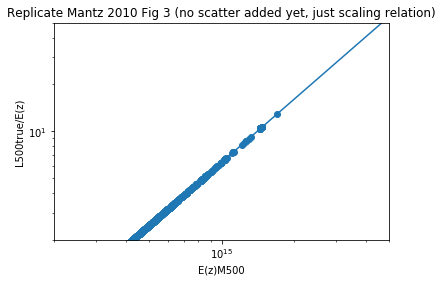

In [10]:
########
#Get Lx and Mx and add to the df (Mantz 2010 eqn 5 and Table 7)
########
#we want to get L500true
df['L500true'] = df['Ez'] * 10 ** ( LxMx_norm + LxMx_slope * np.log10(df['Ez']*df['M500']/10**15) )
df['log10L500true'] = np.log10(df['L500true'])

#Try and replicate Mantz 2010 Figure 3 LHS to check I've done it right
plt.scatter(df['Ez']*df['M500'],df['L500true']/df['Ez'])
plt.plot(np.linspace(1e14,50e14,10), 10 ** ( LxMx_norm + LxMx_slope * np.log10(np.linspace(1e14,50e14,10)/10**15) ))
plt.xlim(2e14,50e14)
plt.ylim(2,50)
plt.xlabel('E(z)M500')
plt.ylabel('L500true/E(z)')
plt.xscale('log')
plt.yscale('log')
plt.title('Replicate Mantz 2010 Fig 3 (no scatter added yet, just scaling relation)')
#plt.savefig('Mantz_relation_no_scatter.png')
#plt.show()
#plt.clf()
#plt.cla()

0.0% done
10.0% done
20.0% done
30.0% done
40.0% done
50.0% done
60.0% done
70.0% done
80.0% done
90.0% done
100.0% done


Text(0.5, 1.0, 'Lx (i.e. scatter added) vs Ltrue')

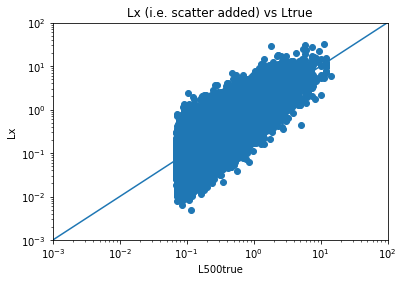

In [15]:
#now sample from a 2D Gaussian with a covariance matrix to describe the
#relation between Lx and Mx
log10Lx = np.array([])
log10Mx = np.array([])
for i in range(len(df)):
    if i%10000 == 0:
        print(f'{np.round(i/len(df)*len(df)/1000)}% done')
        #scipy.stats.multivariate_normal.rvs()
    random_sample = np.random.multivariate_normal(mean = np.array([df['log10L500true'].iloc[i],df['log10M500'].iloc[i]]),
                                                  cov = LxMx_cov_mat)
    log10Lx = np.append(log10Lx, random_sample[0])
    log10Mx = np.append(log10Mx, random_sample[1])


df['log10Lx'] = log10Lx
df['log10Mx'] = log10Mx

df['Lx'] = 10 ** df['log10Lx']
df['Mx'] = 10 ** df['log10Mx']

#plot Ltrue vs Lx just to see scatter and that it's worked as expected
plt.scatter(df['L500true'],df['Lx'])
plt.xlim([10**-3,10**2])
plt.ylim([10**-3,10**2])
plt.plot([10**-3,10**2],[10**-3,10**2])
plt.xlabel('L500true')
plt.ylabel('Lx')
plt.xscale('log')
plt.yscale('log')
plt.title('Lx (i.e. scatter added) vs Ltrue')
#plt.savefig(f'{plots_dir}/Lx_vs_Ltrue.png')
#plt.show()
#plt.clf()
#plt.cla()

Text(0.5, 1.0, 'Mx (i.e. scatter added) vs M500 (true)')

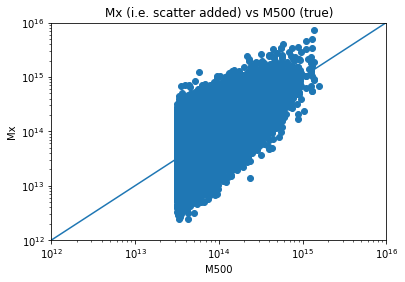

In [17]:
#plot Ltrue vs Lx just to see scatter and that it's worked as expected
plt.scatter(df['M500'],df['Mx'])
plt.xlim([10**12,10**16])
plt.ylim([10**12,10**16])
plt.plot([10**12,10**16],[10**12,10**16])
plt.xlabel('M500')
plt.ylabel('Mx')
plt.xscale('log')
plt.yscale('log')
plt.title('Mx (i.e. scatter added) vs M500 (true)')
#plt.savefig(f'{plots_dir}/Mx_vs_Mtrue.png')
#plt.show()
#plt.clf()
#plt.cla()

Text(0.5, 1.0, 'Replicate Mantz 2010 Fig 3 (with scatter on Lx)')

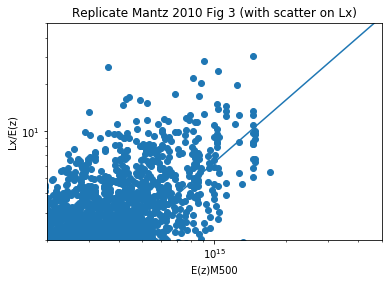

In [18]:
#Try and replicate Mantz 2010 Figure 3 LHS to check I've done it right WITH SCATTER ON LX
plt.scatter(df['Ez']*df['M500'],df['Lx']/df['Ez'])
plt.plot(np.linspace(1e14,50e14,10), 10 ** ( LxMx_norm + LxMx_slope * np.log10(np.linspace(1e14,50e14,10)/10**15) ))
plt.xlim(2e14,50e14)
plt.ylim(2,50)
plt.xlabel('E(z)M500')
plt.ylabel('Lx/E(z)')
plt.xscale('log')
plt.yscale('log')
plt.title('Replicate Mantz 2010 Fig 3 (with scatter on Lx)')
#plt.savefig(f'{plots_dir}/Mantz_relation_with_scatter_on_Lx.png')
#plt.show()
#plt.clf()
#plt.cla()

Text(0.5, 1.0, 'Replicate Mantz 2010 Fig 3 (with scatter on Lx - ZOOMED OUT)')

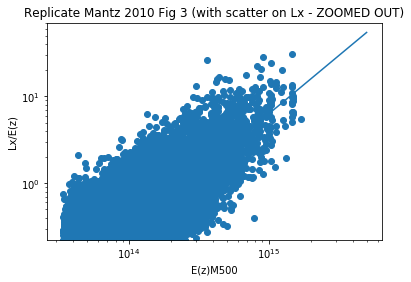

In [19]:
plt.scatter(df['Ez']*df['M500'],df['Lx']/df['Ez'])
plt.plot(np.linspace(1e14,50e14,10), 10 ** ( LxMx_norm + LxMx_slope * np.log10(np.linspace(1e14,50e14,10)/10**15) ))
#plt.xlim(2e14,50e14)
#plt.ylim(2,50)
plt.xlabel('E(z)M500')
plt.ylabel('Lx/E(z)')
plt.xscale('log')
plt.yscale('log')
plt.title('Replicate Mantz 2010 Fig 3 (with scatter on Lx - ZOOMED OUT)')
#plt.savefig(f'{plots_dir}/Mantz_relation_with_scatter_on_Lx_ZOOMED_OUT.png')
#plt.show()
#plt.clf()
#plt.cla()

Text(0.5, 1.0, 'Replicate Mantz 2010 Fig 3 (with scatter on Lx and Mx)')

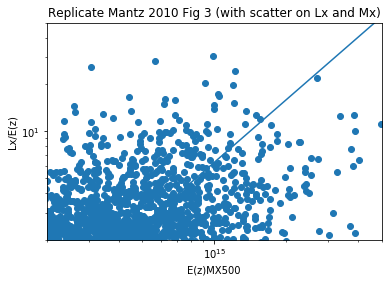

In [20]:
#Try and replicate Mantz 2010 Figure 3 LHS to check I've done it right WITH SCATTER ON LX AND MX
plt.scatter(df['Ez']*df['Mx'],df['Lx']/df['Ez'])
plt.plot(np.linspace(1e14,50e14,10), 10 ** ( LxMx_norm + LxMx_slope * np.log10(np.linspace(1e14,50e14,10)/10**15) ))
plt.xlim(2e14,50e14)
plt.ylim(2,50)
plt.xlabel('E(z)MX500')
plt.ylabel('Lx/E(z)')
plt.xscale('log')
plt.yscale('log')
plt.title('Replicate Mantz 2010 Fig 3 (with scatter on Lx and Mx)')
#plt.savefig(f'{plots_dir}/Mantz_relation_with_scatter_on_Lx_and_Mx.png')
#plt.show()
#plt.clf()
#plt.cla()

Text(0.5, 1.0, 'Replicate Mantz 2010 Fig 3 (with scatter on Lx and Mx - ZOOMED OUT)')

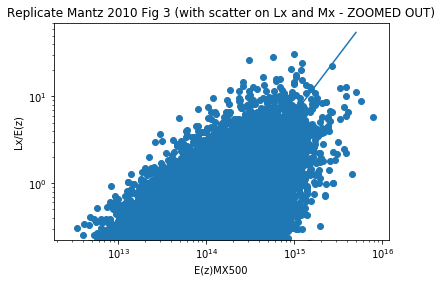

In [21]:
plt.scatter(df['Ez']*df['Mx'],df['Lx']/df['Ez'])
plt.plot(np.linspace(1e14,50e14,10), 10 ** ( LxMx_norm + LxMx_slope * np.log10(np.linspace(1e14,50e14,10)/10**15) ))
#plt.xlim(2e14,50e14)
#plt.ylim(2,50)
plt.xlabel('E(z)MX500')
plt.ylabel('Lx/E(z)')
plt.xscale('log')
plt.yscale('log')
plt.title('Replicate Mantz 2010 Fig 3 (with scatter on Lx and Mx - ZOOMED OUT)')
#plt.savefig(f'{plots_dir}/Mantz_relation_with_scatter_on_Lx_and_Mx_ZOOMED_OUT.png')
#plt.show()
#plt.clf()
#plt.cla()

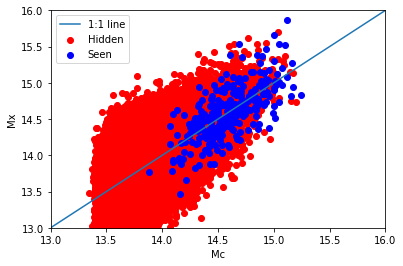

In [22]:
########
#Add flux to df (flux = L / 4* pi * r^2)
########
df['LumDistMpc'] = cosmo.luminosity_distance(df['z'])
df['LumDistCm'] = df['LumDistMpc'] * 3.086e24

df['Fluxergcms'] = df['Lx'] * 1e44 / ( 4 * np.pi * df['LumDistCm']**2 )

########
#assign a Mc assuming a 30% scatter and add to df
########
df['log10Mc'] = np.random.normal(loc = df['log10M500'], scale = Mc_scatter)

########
#plot Mx vs Mc with and without selection effect
########
#Apply flux selection effect
selection_effect_mask =  df['Fluxergcms'] > 5e-12

plt.scatter(df['log10Mc'][np.invert(selection_effect_mask)], df['log10Mx'][np.invert(selection_effect_mask)], c = 'r', label = 'Hidden')
plt.scatter(df['log10Mc'][selection_effect_mask], df['log10Mx'][selection_effect_mask], c = 'b', label = 'Seen')
plt.plot([13,16], [13,16], label = '1:1 line')
plt.xlim([13,16])
plt.ylim([13,16])
plt.xlabel('Mc')
plt.ylabel('Mx')
plt.legend()
#plt.savefig(f'{plots_dir}/Mx_VS_Mc_FINAL_PLOT.png')
#plt.show()
#plt.clf()
#plt.cla()

In [23]:
def cov2corr(cov, return_std=False):
    """
    convert covariance matrix to correlation matrix (TAKEN FROM https://www.statsmodels.org/stable/_modules/statsmodels/stats/moment_helpers.html#cov2corr)

    Parameters
    ----------
    cov : array_like, 2d
        covariance matrix, see Notes

    Returns
    -------
    corr : ndarray (subclass)
        correlation matrix
    return_std : bool
        If this is true then the standard deviation is also returned.
        By default only the correlation matrix is returned.

    Notes
    -----
    This function does not convert subclasses of ndarrays. This requires that
    division is defined elementwise. np.ma.array and np.matrix are allowed.
    """
    cov = np.asanyarray(cov)
    std_ = np.sqrt(np.diag(cov))
    corr = cov / np.outer(std_, std_)
    if return_std:
        return corr, std_
    else:
        return corr